# Exemplo - Diagrama de Diferença Crítica

Neste é código é apresentado o exemplo utilizado para gerar a Figura 6 da Seção 2.1.4, onde é calculado o diagrama CD dos resultados de 5 algoritmos distintos.

In [1]:
'''  
Carrega os pacotes necessários
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import wilcoxon, friedmanchisquare, rankdata
from Orange.evaluation import compute_CD, graph_ranks

import warnings
warnings.filterwarnings('ignore')

In [2]:
'''
Gera um exemplo sintético dos resultados, de modo aleatório (fixa o seed em 42), de 5 algoritmos em 
20 conjuntos de dados distintos.
'''
np.random.seed(42)
algoritmo1 = np.random.normal(0.80, 0.05, 20)
algoritmo2 = np.random.normal(0.75, 0.10, 20)
algoritmo3 = np.random.normal(0.75, 0.15, 20)
algoritmo4 = np.random.normal(0.75, 0.12, 20)
algoritmo5 = np.random.normal(0.90, 0.02, 20)

results = pd.DataFrame(columns = ['Dataset', 'Algoritmo 1', 'Algoritmo 2', 'Algoritmo 3', 
                                  'Algoritmo 4', 'Algoritmo 5'])
results['Dataset'] = np.arange(1, 21, 1)
results.index = np.arange(1, 21, 1)
results['Algoritmo 1'] = algoritmo1
results['Algoritmo 2'] = algoritmo2
results['Algoritmo 3'] = algoritmo3
results['Algoritmo 4'] = algoritmo4
results['Algoritmo 5'] = algoritmo5

In [3]:
'''
Exibe os valores resultantes
''' 
results

,Dataset,Algoritmo 1,Algoritmo 2,Algoritmo 3,Algoritmo 4,Algoritmo 5
1,1,0.824836,0.896565,0.860770,0.692499,0.895607
2,2,0.793087,0.727422,0.775705,0.727721,0.907142
3,3,0.832384,0.756753,0.732653,0.617240,0.929558
4,4,0.876151,0.607525,0.704834,0.606455,0.889635
5,5,0.788292,0.695562,0.528222,0.847503,0.883830
6,6,0.788293,0.761092,0.642023,0.912749,0.889965
7,7,0.878961,0.634901,0.680904,0.741359,0.918308
8,8,0.838372,0.787570,0.908568,0.870424,0.906575
9,9,0.776526,0.689936,0.801543,0.793396,0.889405
10,10,0.827128,0.720831,0.485544,0.672586,0.910265


In [4]:
'''
Calcula os ranque de cada algoritmo nos 20 conjuntos de dados, utilizado para o teste não-paramétrico
'''
algorithms_names = results.drop('Dataset', axis=1).columns
results_array = results[algorithms_names].values
ranks = np.array([rankdata(-p) for p in results_array])
pd.DataFrame(ranks, index=range(1,21, 1), columns = ['Algoritmo 1', 'Algoritmo 2', 'Algoritmo 3', 
                                                     'Algoritmo 4', 'Algoritmo 5'])

,Algoritmo 1,Algoritmo 2,Algoritmo 3,Algoritmo 4,Algoritmo 5
1,4.0,1.0,3.0,5.0,2.0
2,2.0,5.0,3.0,4.0,1.0
3,2.0,3.0,4.0,5.0,1.0
4,2.0,4.0,3.0,5.0,1.0
5,3.0,4.0,5.0,2.0,1.0
6,3.0,4.0,5.0,1.0,2.0
7,2.0,5.0,4.0,3.0,1.0
8,4.0,5.0,1.0,3.0,2.0
9,4.0,5.0,2.0,3.0,1.0
10,2.0,3.0,5.0,4.0,1.0


In [5]:
'''
Calcula a média dos ranques
'''
average_ranks = np.mean(ranks, axis=0)
print('\n'.join('({}) Média dos ranks: {}'.format(a, r) for a, r in zip(algorithms_names, average_ranks)))

(Algoritmo 1) Média dos ranks: 3.2
(Algoritmo 2) Média dos ranks: 3.8
(Algoritmo 3) Média dos ranks: 3.2
(Algoritmo 4) Média dos ranks: 3.35
(Algoritmo 5) Média dos ranks: 1.45


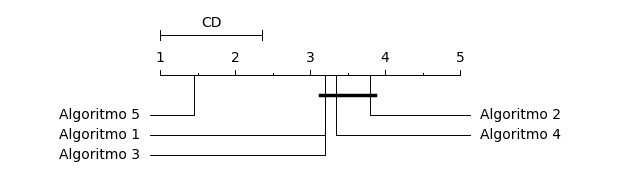

In [6]:
'''
Aplica o teste post-hoc de Nemenyi e gera o diagrama CD correspondente. 
'''
cd = compute_CD(average_ranks, n=len(results), alpha='0.05', test='nemenyi')
graph_ranks(average_ranks, names=algorithms_names, cd=cd, width=6, textspace=1.5, reverse=False, 
            filename = 'nemenyi.pdf')
plt.show()